In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the Alpaca api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# api = tradeapi.REST()
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [132]:
# Get all Asstes
assets = api.list_assets()

# Keep only tradeable assets
tradeable = [asset for asset in assets if asset.tradable ]
# Create a new empty DataFrame
asset_info_df = pd.DataFrame()
asset_info_df['symbol'] = pd.Series([asset.symbol for asset in assets])
# Display the first 10 asset tickers
# Set the ticker
myportfolio=["AGG","SPY"]
timeframe = '1D'
# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)
# Get 1 year's worth of historical data for AGG,SPY

df=api.get_barset(
    myportfolio,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
    ).df
 
#df.head(2)
 

In [133]:
df = df.droplevel(axis=1, level=0)
df.drop(columns=['open', 'high', 'low', 'volume'], inplace=True) 
df.index = df.index.date
df.columns=['AGG','SPY']
df['port']=.4*df['AGG']+0.6*df['SPY']
df.drop(columns=['AGG','SPY'], inplace=True)
#df.head(2)

In [ ]:
# Calculate the Daily Return of the Portfolio

In [134]:
# Use the `pct_change` function to calculate daily returns of AAPL
daily_returns=df.pct_change()
daily_returns.head()

,port
2019-12-02,NaN
2019-12-03,-0.004579
2019-12-04,0.004816
2019-12-05,0.001310
2019-12-06,0.006948


In [ ]:
Calculate the Volatility of Return

In [135]:
# Use the `std` function to calculate the standard deviation of daily returns for AAPL
std_dev_daily_return= daily_returns.std()['port']
std_dev_daily_return

0.024123114218262093

In [136]:
# Set number of trading days and get last closing price of AAPL from DataFrame
num_trading_days = 252 *30
num_simulations = 500
last_price =df['port'][-1]
last_price 

216.764

In [137]:
# Initialize the simulated prices list with the last closing price of AAPL
simulated_prices = [last_price]
avg_daily_return = daily_returns.mean()['port']

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `500` times
for n in range(num_simulations):

    # Initialize the simulated prices list with the last closing price of AAPL
    simulated_prices = [last_price]
    
    # Simulate the returns for 252 *30 days
    for i in range(num_trading_days):
        # Calculate the simulated price using the last price within the list
        simulated_price = simulated_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
        # Append the simulated price to the list
        simulated_prices.append(simulated_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df[f"Simulation {n+1}"] = pd.Series(simulated_prices)

# Print head of DataFrame
simulated_price_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 491,Simulation 492,Simulation 493,Simulation 494,Simulation 495,Simulation 496,Simulation 497,Simulation 498,Simulation 499,Simulation 500
0,216.764000,216.764000,216.764000,216.764000,216.764000,216.764000,216.764000,216.764000,216.764000,216.764000,...,216.764000,216.764000,216.764000,216.764000,216.764000,216.764000,216.764000,216.764000,216.764000,216.764000
1,219.276070,208.664301,211.292350,211.816133,208.873922,215.463973,214.716063,208.739907,220.118554,218.431126,...,212.989649,219.313655,211.841649,211.360476,217.577327,213.350272,215.777608,225.723097,213.159552,226.264846
2,218.458456,202.901316,211.956633,205.473613,208.089522,212.441763,220.150054,208.580407,231.957783,219.860790,...,203.994373,216.709346,211.631868,217.708124,221.804161,214.095838,222.930078,218.583805,213.355556,233.979359
3,221.785783,207.581245,214.902856,202.450026,205.840960,204.202756,220.246005,203.125356,235.793164,215.969837,...,205.891806,219.113535,215.303434,207.245916,218.292177,207.031451,222.380146,214.117378,215.021376,242.216772
4,229.847007,211.870085,218.084888,202.734294,210.458839,194.815426,209.543393,203.674965,231.461871,222.122623,...,202.921776,222.919361,222.080076,204.431195,218.359187,204.904318,229.088575,209.540959,211.784217,235.695978


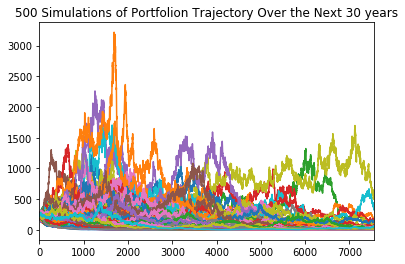

In [139]:
# Use the `plot` function to plot the trajectory of Portfolio stock based on a 252 * 30 trading day simulation
plot_title = f"{n+1} Simulations of Portfolion Trajectory Over the Next 30 years"
simulated_price_df.plot(legend=None, title=plot_title)

In [141]:
  # Calculate the daily returns of simulated prices
simulated_daily_returns = simulated_price_df.pct_change()
# Calculate the normalized, cumulative return series
portfolio_cumulative_returns= (1 + simulated_daily_returns.fillna(0)).cumprod()
# Print records from the DataFrame
portfolio_cumulative_returns.head()


,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 491,Simulation 492,Simulation 493,Simulation 494,Simulation 495,Simulation 496,Simulation 497,Simulation 498,Simulation 499,Simulation 500
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011589,0.962634,0.974758,0.977174,0.963601,0.994003,0.990552,0.962982,1.015476,1.007691,...,0.982588,1.011762,0.977292,0.975072,1.003752,0.984251,0.995449,1.041331,0.983372,1.043830
2,1.007817,0.936047,0.977822,0.947914,0.959982,0.980060,1.015621,0.962247,1.070094,1.014286,...,0.941090,0.999748,0.976324,1.004356,1.023252,0.987691,1.028446,1.008395,0.984276,1.079420
3,1.023167,0.957637,0.991414,0.933965,0.949609,0.942051,1.016064,0.937081,1.087787,0.996336,...,0.949843,1.010839,0.993262,0.956090,1.007050,0.955101,1.025909,0.987790,0.991961,1.117422
4,1.060356,0.977423,1.006094,0.935277,0.970912,0.898744,0.966689,0.939616,1.067806,1.024721,...,0.936142,1.028397,1.024525,0.943105,1.007359,0.945288,1.056857,0.966678,0.977027,1.087339


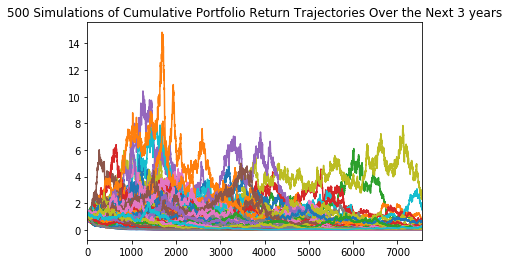

In [142]:
# Use the `plot` function to plot `500` simulations of the potential trajectories of the portfolio based on 252 trading days
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 3 years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [148]:
# Select the last row for project stock prices (prices of each simulation on the 252nd trading day)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.value_counts(bins=10) / len(ending_cumulative_returns)
# Use the `quantile` function to calculate the 90% confidence interval for simulated ending prices
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    0.000151
0.95    0.165711
Name: 7560, dtype: float64

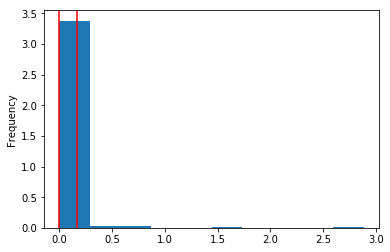

In [149]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [150]:
confidence_interval_90 = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval_90

0.05    0.000151
0.95    0.165711
Name: 7560, dtype: float64

In [151]:
confidence_interval_50 = ending_cumulative_returns.quantile(q=[0.25, 0.75])
confidence_interval_50

0.25    0.001268
0.75    0.022974
Name: 7560, dtype: float64

In [152]:
confidence_interval_10 = ending_cumulative_returns.quantile(q=[0.40, 0.50])
confidence_interval_10

0.4    0.002926
0.5    0.004795
Name: 7560, dtype: float64

In [153]:
# Set initial investment
initial_investment = 20000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound = initial_investment + (initial_investment * confidence_interval_90.iloc[0])
investment_pnl_upper_bound = initial_investment + (initial_investment * confidence_interval_90.iloc[1])
                                                    
# Print the results
print(f"There is a 90% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${investment_pnl_lower_bound} and ${investment_pnl_upper_bound}")

There is a 90% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $20003.013761302613 and $23314.229929267407


In [154]:
# Set initial investment
initial_investment = 20000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound = initial_investment + (initial_investment * confidence_interval_50.iloc[0])
investment_pnl_upper_bound = initial_investment + (initial_investment * confidence_interval_50.iloc[1])
                                                    
# Print the results
print(f"There is a 50% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${investment_pnl_lower_bound} and ${investment_pnl_upper_bound}")

There is a 50% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $20025.365693244097 and $20459.48217500616


In [156]:
#Set initial investment
initial_investment = 20000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound = initial_investment + (initial_investment * confidence_interval_10.iloc[0])
investment_pnl_upper_bound = initial_investment + (initial_investment * confidence_interval_10.iloc[1])
                                                    
# Print the results
print(f"There is a 10% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${investment_pnl_lower_bound} and ${investment_pnl_upper_bound}")

There is a 10% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $20058.517112650887 and $20095.908078602577


In [ ]:
#Given the current projected annual income from the Plaid analysis, will a 4% withdrawal rate meet or exceed that value at the 10th percentile? Note: This is basically determining if retirement income is equivalent to current income.

In [ ]:
# No, it would not. 4% with witdrawel rate would give you $800
# your projected income is $7389

In [ ]:
How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal? In other words, what happens if the initial investment had been bigger?

In [157]:
#Set initial investment
initial_investment = 30000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound = initial_investment + (initial_investment * confidence_interval_10.iloc[0])
investment_pnl_upper_bound = initial_investment + (initial_investment * confidence_interval_10.iloc[1])
                                                    
# Print the results
print(f"There is a 10% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${investment_pnl_lower_bound} and ${investment_pnl_upper_bound}")

There is a 10% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $30087.77566897633 and $30143.862117903864


In [ ]:
Still 4% withdraw rate would give you $1200. it is lower than $7389

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

# Calculate the daily returns for  AGG closing prices

In [118]:
# Use the `pct_change` function to calculate daily returns of AAPL
daily_returns = df.pct_change()
daily_returns.head()

,AGG
2019-12-02,NaN
2019-12-03,0.004801
2019-12-04,-0.001947
2019-12-05,-0.000975
2019-12-06,-0.001331


# Calculate the daily returns for the SPY   closing prices.

In [ ]:
# Use the `pct_change` function to calculate daily returns of AAPL
daily_returns_spy = spy.pct_change()
daily_returns_spy.head()

# Calculate volatility  SPY  

In [ ]:
# Use the `std` function to calculate the standard deviation of daily returns for AAPL
std_dev_daily_return_spy = daily_returns_spy.std()['close']
std_dev_daily_return_spy

# Calculate volatility   AGG  

In [ ]:
# Use the `std` function to calculate the standard deviation of daily returns for AAPL
std_dev_daily_return_agg = daily_returns_agg.std()['close']
std_dev_daily_return_agg

# Find the last day's closing price for both stocks and save those as variables.

In [ ]:
# Set number of trading days and get last closing price of AAPL from DataFrame
num_trading_days = 252 *30
num_simulations = 500
spy_last_price =spy_n['SPY'][-1]
agg_last_price =agg_n['AGG'][-1]
spy_last_price 

In [ ]:
# Initialize the simulated prices list with the last closing price of AAPL
simulated_prices = [spy_last_price]
avg_daily_return_spy = daily_returns_spy.mean()['close']

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_spyprice_df = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):

    # Initialize the simulated prices list with the last closing price of AAPL
    simulated_spy_prices = [spy_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_trading_days):
        # Calculate the simulated price using the last price within the list
        simulated_price_spy = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        # Append the simulated price to the list
        simulated_spy_prices.append(simulated_price_spy)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_spyprice_df[f"Simulation {n+1}"] = pd.Series(simulated_spy_prices)

# Print head of DataFrame
simulated_spyprice_df.head()

# Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

In [ ]:
# Initialize the simulated prices list with the last closing price of AAPL
simulated_spy_prices = [spy_last_price]
avg_daily_return_spy = daily_returns_spy.mean()['close']

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_spyprice_df = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):

    # Initialize the simulated prices list with the last closing price of AAPL
    simulated_spy_prices = [spy_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_trading_days):
        # Calculate the simulated price using the last price within the list
        simulated_price_spy = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        # Append the simulated price to the list
        simulated_spy_prices.append(simulated_price_spy)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_spyprice_df[f"Simulation {n+1}"] = pd.Series(simulated_spy_prices)

# Print head of DataFrame
simulated_spyprice_df.head()

In [ ]:
# Calculate the # Initialize the simulated prices list with the last closing price of AAPL
simulated_agg_prices = [agg_last_price]
avg_daily_return_agg = daily_returns_agg.mean()['close']

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_aggprice_df = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):

    # Initialize the simulated prices list with the last closing price of AAPL
    simulated_agg_prices = [agg_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_trading_days):
        # Calculate the simulated price using the last price within the list
        simulated_price_agg = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, std_dev_daily_return_agg))
        # Append the simulated price to the list
        simulated_agg_prices.append(simulated_price_agg)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_aggprice_df[f"Simulation {n+1}"] = pd.Series(simulated_agg_prices)

# Print head of DataFrame
simulated_aggprice_df.head() 


In [8]:
 # Use the `plot` function to plot the trajectory of SPY stock based on a 252 trading day simulation
plot_title = f"{n+1} Simulations of SPY Stock Price Trajectory Over the Next 252 Trading Days"
simulated_spyprice_df.plot(legend=None, title=plot_title)

In [9]:
 # Use the `plot` function to plot the trajectory of AGG stock based on a 252 trading day simulation
plot_title = f"{n+1} Simulations of SPY Stock Price Trajectory Over the Next 252 Trading Days"
simulated_aggprice_df.plot(legend=None, title=plot_title)

In [14]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE

In [ ]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE

In [ ]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE

In [ ]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [ ]:
# YOUR CODE HERE

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [ ]:
# YOUR CODE HERE

### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [ ]:
# YOUR CODE HERE

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [ ]:
# YOUR CODE HERE

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE